# Примеры использования

In [1]:
load("../src/dps.sage")

**Протестировано на версии Sage 9.2**

In [2]:
import warnings
warnings.filterwarnings('ignore')

Необходимо задать схему в виде правой части дифференциального уравнения 
$$
\frac{dx}{dt} = F(\hat{x}, x, dt)
$$
В качестве исходной функции нужно задать [формальную функцию](https://doc.sagemath.org/html/en/reference/calculus/sage/symbolic/function_factory.html). Обратите внимание, что:

In [3]:
var('x')
function('f') == function('f')(x)

False

## Коэффициенты

### Неявная схема

In [4]:
var('xx,x,t')
a_param = var(['a'] +['a' + str(i) for i in range(10)])
f = function('f', nargs = 1)
F = a0*f(xx) + a1*f(x)

In [5]:
s = Scheme([x,t],[f,_],a_param, F, order = 2, n_val = xx)
s.latex()

\frac{dx}{dt} = a_{1} f\left(x\right) + a_{0} f\left(\mathit{xx}\right)


$$\frac{dx}{dt} = a_{1} f\left(x\right) + a_{0} f\left(\mathit{xx}\right)$$

In [6]:
s.parametric_eqs(right = x^2 + 1)

[x == x,
 x^2 + 1 == (a0 + a1)*x^2 + a0 + a1,
 x^3 + x == 2*(a0^2 + a0*a1)*x^3 + 2*(a0^2 + a0*a1)*x]

Для рассчета коэффициентов выберем функцию $x^2 + 1$

In [7]:
s.coefficients(right = x^2 + 1)

[a0 - 1/2, a1 - 1/2]

### Явная схема Рунге-Кутты 4-го порядка

In [8]:
a_param = var(['a'] +['a' + str(i) for i in range(10)])
def rk4():
    k1 = f(x)
    k2 = f(x + k1*dt*a0)
    k3 = f(x + k2*dt*a1)
    k4 = f(x + k3*dt*a2)
    return a3*k1 + a4*k2 + a5*k3 + a6*k4

In [9]:
s = Scheme([x,t], [f,_], a_param, rk4(), order = 4)
s.parametric_eqs()

[x == x,
 f(x) == (a3 + a4 + a5 + a6)*f(x),
 1/2*f(x)*diff(f(x), x) == (a0*a4 + a1*a5 + a2*a6)*f(x)*diff(f(x), x),
 1/6*f(x)*diff(f(x), x)^2 + 1/6*f(x)^2*diff(f(x), x, x) == (a0*a1*a5 + a1*a2*a6)*f(x)*diff(f(x), x)^2 + 1/2*(a0^2*a4 + a1^2*a5 + a2^2*a6)*f(x)^2*diff(f(x), x, x),
 1/24*f(x)*diff(f(x), x)^3 + 1/6*f(x)^2*diff(f(x), x)*diff(f(x), x, x) + 1/24*f(x)^3*diff(f(x), x, x, x) == a0*a1*a2*a6*f(x)*diff(f(x), x)^3 + 1/2*((a0^2*a1 + 2*a0*a1^2)*a5 + (a1^2*a2 + 2*a1*a2^2)*a6)*f(x)^2*diff(f(x), x)*diff(f(x), x, x) + 1/6*(a0^3*a4 + a1^3*a5 + a2^3*a6)*f(x)^3*diff(f(x), x, x, x)]

In [10]:
s.parametric_eqs(x^3 - 2)

[x == x,
 x^3 - 2 == (a3 + a4 + a5 + a6)*x^3 - 2*a3 - 2*a4 - 2*a5 - 2*a6,
 3/2*x^5 - 3*x^2 == 3*(a0*a4 + a1*a5 + a2*a6)*x^5 - 6*(a0*a4 + a1*a5 + a2*a6)*x^2,
 5/2*x^7 - 7*x^4 + 4*x == 3*(a0^2*a4 + (3*a0*a1 + a1^2)*a5 + (3*a1*a2 + a2^2)*a6)*x^7 - 6*(2*a0^2*a4 + (3*a0*a1 + 2*a1^2)*a5 + (3*a1*a2 + 2*a2^2)*a6)*x^4 + 12*(a0^2*a4 + a1^2*a5 + a2^2*a6)*x,
 35/8*x^9 - 63/4*x^6 + 15*x^3 - 2 == (a0^3*a4 + (9*a0^2*a1 + 18*a0*a1^2 + a1^3)*a5 + (18*a1*a2^2 + a2^3 + 9*(3*a0*a1 + a1^2)*a2)*a6)*x^9 - 6*(a0^3*a4 + (6*a0^2*a1 + 12*a0*a1^2 + a1^3)*a5 + (12*a1*a2^2 + a2^3 + 3*(3*a0*a1 + 2*a1^2)*a2)*a6)*x^6 - 8*a0^3*a4 - 8*a1^3*a5 - 8*a2^3*a6 + 12*(a0^3*a4 + (3*a0^2*a1 + 6*a0*a1^2 + a1^3)*a5 + (3*a1^2*a2 + 6*a1*a2^2 + a2^3)*a6)*x^3]

In [11]:
s.coefficients(right = x)

[a2^3*a6^3 + 1/4*a2^2*a4*a6^2 - 1/16*a1*a5^3 + 1/16*a2*a4*a5*a6 - 1/16*a2*a5^2*a6 - 1/2*a2^2*a6^2 + 1/6*a2*a5*a6 - 1/96*a5^2, a1*a2^2*a6^2 - 1/6*a2*a6 + 1/24*a5, a1^2*a5^2 - a1*a2*a4*a6 - a2^2*a6^2 + 1/4*a1*a5^2 - 1/4*a2*a4*a6 + 1/4*a2*a5*a6 - 1/2*a1*a5 + 1/2*a2*a6 + 1/6*a4 - 1/8*a5, a1*a2*a5*a6 + a2^2*a6^2 - 1/4*a1*a5^2 + 1/4*a2*a4*a6 - 1/4*a2*a5*a6 - 1/2*a2*a6 + 1/8*a5, a0*a1*a5 + a1*a2*a6 - 1/6, a0*a2*a6 - 1/4*a0*a5 - 1/4*a2*a6, a0*a4 + a1*a5 + a2*a6 - 1/2, a3 + a4 + a5 + a6 - 1]

Проверим известный набор коэффициентов

In [12]:
a3 = 1/6; a4 = 1/3
a5 = 1/3; a6 = 1/6
a1 = 1/2; a0 = 1/2
a2 = 1
s = Scheme([x,t],[f,_], a_param, rk4(), order = 4)
s.parametric_eqs()

[x == x,
 f(x) == f(x),
 1/2*f(x)*diff(f(x), x) == 1/2*f(x)*diff(f(x), x),
 1/6*f(x)*diff(f(x), x)^2 + 1/6*f(x)^2*diff(f(x), x, x) == 1/6*f(x)*diff(f(x), x)^2 + 1/6*f(x)^2*diff(f(x), x, x),
 1/24*f(x)*diff(f(x), x)^3 + 1/6*f(x)^2*diff(f(x), x)*diff(f(x), x, x) + 1/24*f(x)^3*diff(f(x), x, x, x) == 1/24*f(x)*diff(f(x), x)^3 + 1/6*f(x)^2*diff(f(x), x)*diff(f(x), x, x) + 1/24*f(x)^3*diff(f(x), x, x, x)]

In [13]:
s.coefficients(right = x)

[0]

### Дифференциально-параметрическая схема 4-го порядка

In [14]:
a_param = var(['a'] +['a' + str(i) for i in range(10)])
L = function('L') # оператор

F = a0*f(x)+ a1*L(f(x))*dt +\
    a2*f(x + a3*f(x)*dt + a4*L(f(x))*dt^2) +\
    a4*f(x + a5*f(x)*dt + a6*L(f(x))*dt^2 + a7*L(L(f(x)))*dt^3) 

In [15]:
s = Scheme([x,t],[f,L],a_param, F, order = 4)
s.coefficients(right = x)

[a3*a6*a7 - 4*a3*a7^2 - a1*a7 - 1/24*a5 + 1/2*a7, a4*a5 - a3*a6 + 4*a3*a7 + a1 - 1/2, a4*a7 - 1/24, a0 + a4 - a6 + 4*a7 - 1, a2 + a6 - 4*a7]

## Проверка 

In [16]:
!git clone https://github.com/malykhmd/fdm
%cd fdm
load('fdm.sage')
%cd ..
!rm -rf fdm/ 

Клонирование в «fdm»…
remote: Enumerating objects: 262, done.
remote: Counting objects: 100% (111/111), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 262 (delta 73), reused 93 (delta 62), pack-reused 151
Получение объектов: 100% (262/262), 3.80 MiB | 5.12 MiB/s, готово.
Определение изменений: 100% (149/149), готово.
/home/kadrov_vm/Кадров/tmp/fdm
/home/kadrov_vm/Кадров/tmp


$$
\left \{ \begin{aligned} &
\frac{d}{dt} x = y , \quad  \frac{d}{dt} y = -x , \\ &
x (0)= 0 , \quad y (0)= 1
\end{aligned} \right.
$$

In [17]:
var("x1,x2")
pr1 = Initial_problem([x1,x2],[x2,-x1],[0,1],10)

In [18]:
C = {
    a0: 1/2,
    a1: 5/24,
    a2: 1/4,
    a3: 2/3,
    a4: 1/4,
    a5: 1/2,
    a6: 5/12,
    a7: 1/6,
}

In [19]:
sol = dps(pr1, s, C, N = 50)

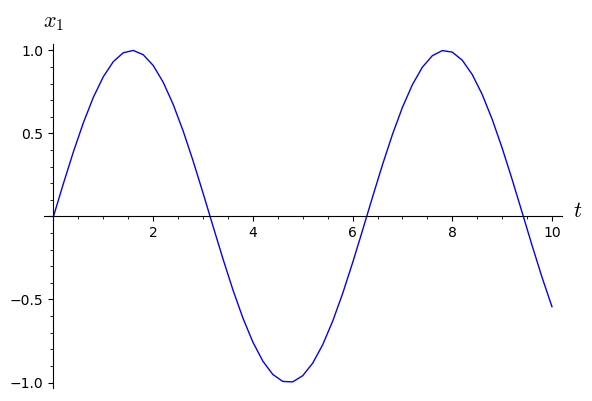

In [20]:
sol.plot(t,x1)

In [21]:
L = [dps(pr1, s, C, N=10*2^n) for n in range(10)]

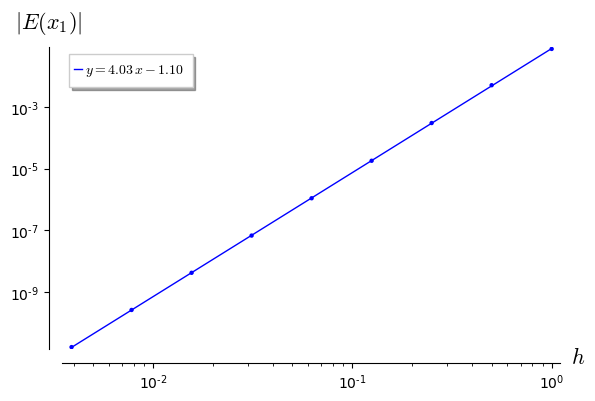

In [22]:
richardson_plot(L,x1,10)